In [27]:
import pandas as pd
import os
import seaborn as sns

sns.set_style("darkgrid")
os.walk
for dirname, _, filenames in os.walk('datasets/world_happiness_report'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets/world_happiness_report/2019.csv
datasets/world_happiness_report/2018.csv
datasets/world_happiness_report/2015.csv
datasets/world_happiness_report/2016.csv
datasets/world_happiness_report/2017.csv


In [106]:
for dirname, _, filenames in os.walk('datasets/world_happiness_report'):
    for filename in filenames:
        print(os.path.join(dirname, filename), os.path.splitext(filename)[0])

datasets/world_happiness_report/2019.csv 2019
datasets/world_happiness_report/2018.csv 2018
datasets/world_happiness_report/2015.csv 2015
datasets/world_happiness_report/2016.csv 2016
datasets/world_happiness_report/2017.csv 2017


In [110]:
dfs = {}
for dirname, _, filenames in os.walk('datasets/world_happiness_report'):
    for filename in filenames:
        dfs[int(os.path.splitext(filename)[0])] = pd.read_csv(os.path.join(dirname, filename))

#df_2015 = pd.read_csv('datasets/world_happiness_report/2015.csv')
#df_2016 = pd.read_csv('datasets/world_happiness_report/2016.csv')
#df_2017 = pd.read_csv('datasets/world_happiness_report/2017.csv')
#df_2018 = pd.read_csv('datasets/world_happiness_report/2018.csv')
#df_2019 = pd.read_csv('datasets/world_happiness_report/2019.csv')

In [111]:
dfs[2016].head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [112]:
dfs[2016].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


In [85]:
dfs[2016].describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


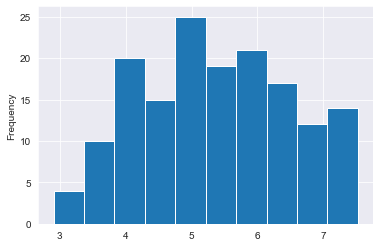

In [113]:
dfs[2016]['Happiness Score'].plot.hist(bins=10)

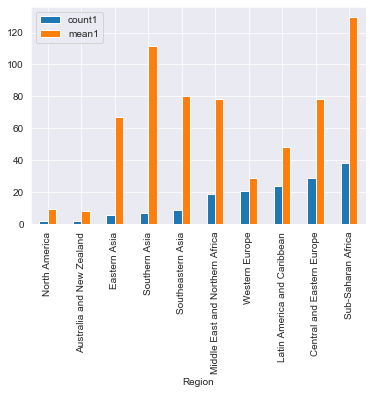

In [114]:
dfs[2016].groupby('Region', sort=False)['Happiness Rank']\
    .agg(['count', 'mean'])\
    .rename(columns={'count':'count1','mean':'mean1'})\
    .sort_values(by='count1', ascending=True).reset_index()\
    .plot.bar(x='Region', y=['count1', 'mean1'])

In [125]:
for key, df in dfs.items():
    df['Year'] = key
    #df.drop(key, axis=1, inplace=True)
#df_2015.drop('Year', axis=1, inplace=True)


In [129]:
dfs[2015].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [130]:
dfs[2016].head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [131]:
dfs[2016].head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [132]:
dfs[2017].head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [133]:
dfs[2018].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [134]:
dfs[2019].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [168]:
rename_col={'Happiness Rank':'Happiness_rank', 'Overall rank':'Happiness_rank', 'Country or region':'Country',
            'Happiness Score':'Happiness_score','Score':'Happiness_score', 'Economy (GDP per Capita)':'GDP_per_capita',
            'GDP per capita':'GDP_per_capita','Economy..GDP.per.Capita.':'GDP_per_capita',
            'Freedom to make life choices':'Freedom', 'Healthy life expectancy':'Healthy_life_expectancy',
            'Health..Life.Expectancy.':'Healthy_life_expectancy','Health (Life Expectancy)':'Healthy_life_expectancy'
           }
for df in dfs.values():
    df.rename(columns=rename_col, inplace=True)
columns = ['Country','Year']
columns.extend(list(set(rename_col.values())))
dfs[2019][columns].head(5)
df = pd.concat([dfs[2015][columns], dfs[2016][columns]], ignore_index=True)
df[df.Year==2015].head(10)

,Country,Year,GDP_per_capita,Freedom,Happiness_rank,Country,Healthy_life_expectancy,Happiness_score
0,Switzerland,2015,1.39651,0.66557,1,Switzerland,0.94143,7.587
1,Iceland,2015,1.30232,0.62877,2,Iceland,0.94784,7.561
2,Denmark,2015,1.32548,0.64938,3,Denmark,0.87464,7.527
3,Norway,2015,1.45900,0.66973,4,Norway,0.88521,7.522
4,Canada,2015,1.32629,0.63297,5,Canada,0.90563,7.427
5,Finland,2015,1.29025,0.64169,6,Finland,0.88911,7.406
6,Netherlands,2015,1.32944,0.61576,7,Netherlands,0.89284,7.378
7,Sweden,2015,1.33171,0.65980,8,Sweden,0.91087,7.364
8,New Zealand,2015,1.25018,0.63938,9,New Zealand,0.90837,7.286
9,Australia,2015,1.33358,0.65124,10,Australia,0.93156,7.284
